In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Unzip Dataset

In [4]:
!unzip /content/drive/MyDrive/AffectNet-8Labels.zip

Archive:  /content/drive/MyDrive/AffectNet-8Labels.zip
 extracting: AffectNet8Labels_Documentation_OneDrive_March2021.pdf  
 extracting: train_set.tar           
 extracting: val_set.tar             


In [5]:
!tar -xvf train_set.tar

Streaming output truncated to the last 5000 lines.
train_set/annotations/392066_lnd.npy
train_set/annotations/83536_lnd.npy
train_set/annotations/26361_lnd.npy
train_set/annotations/313969_aro.npy
train_set/annotations/286825_exp.npy
train_set/annotations/392215_aro.npy
train_set/annotations/330087_lnd.npy
train_set/annotations/110001_val.npy
train_set/annotations/371482_aro.npy
train_set/annotations/27940_aro.npy
train_set/annotations/35729_exp.npy
train_set/annotations/156731_aro.npy
train_set/annotations/145081_aro.npy
train_set/annotations/93043_exp.npy
train_set/annotations/279607_lnd.npy
train_set/annotations/48472_lnd.npy
train_set/annotations/206512_exp.npy
train_set/annotations/84264_aro.npy
train_set/annotations/187769_lnd.npy
train_set/annotations/300707_exp.npy
train_set/annotations/123766_exp.npy
train_set/annotations/173216_aro.npy
train_set/annotations/262096_lnd.npy
train_set/annotations/194946_aro.npy
train_set/annotations/411301_aro.npy
train_set/annotations/43103_aro

In [6]:
!tar -xvf val_set.tar

Streaming output truncated to the last 5000 lines.
val_set/annotations/678_lnd.npy
val_set/annotations/1526_lnd.npy
val_set/annotations/5420_aro.npy
val_set/annotations/4628_exp.npy
val_set/annotations/5254_lnd.npy
val_set/annotations/4769_aro.npy
val_set/annotations/1994_lnd.npy
val_set/annotations/4840_lnd.npy
val_set/annotations/3546_val.npy
val_set/annotations/2606_lnd.npy
val_set/annotations/1282_val.npy
val_set/annotations/948_lnd.npy
val_set/annotations/2672_lnd.npy
val_set/annotations/1599_aro.npy
val_set/annotations/2177_exp.npy
val_set/annotations/1830_val.npy
val_set/annotations/4676_aro.npy
val_set/annotations/3228_aro.npy
val_set/annotations/5196_aro.npy
val_set/annotations/714_val.npy
val_set/annotations/2296_exp.npy
val_set/annotations/934_lnd.npy
val_set/annotations/1511_val.npy
val_set/annotations/2923_exp.npy
val_set/annotations/4198_aro.npy
val_set/annotations/886_lnd.npy
val_set/annotations/1924_exp.npy
val_set/annotations/1462_lnd.npy
val_set/annotations/812_exp.np

# Data Counts

In [7]:
import glob
train_data_path = glob.glob('./train_set/images/*')

In [8]:
print(len(train_data_path))

287651


In [9]:
val_data_path = glob.glob('./val_set/images/*')
print(len(val_data_path))

3999


# Show Data Sample

In [10]:
img = cv2.imread('./train_set/images/0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

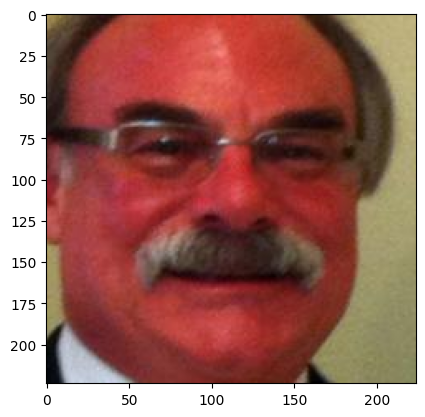

In [11]:
plt.imshow(img)

In [12]:
annotations = glob.glob('./train_set/annotations/*')

In [13]:
labels = {
     0: 'Neutral',
     1: 'Happy',
     2: 'Sad',
     3: 'Surprise',
     4: 'Fear',
     5: 'Disgust',
     6: 'Anger',
     7: 'Contempt'
}

In [14]:
label = np.load('./train_set/annotations/0_exp.npy')

Text(0.5, 1.0, 'Happy')

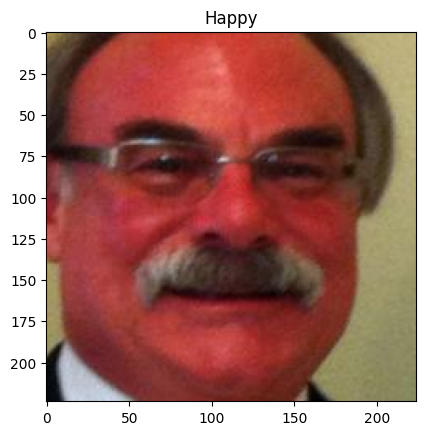

In [15]:
image_name = '0'
img = cv2.imread(f'./train_set/images/{image_name}.jpg')
label = np.load(f'./train_set/annotations/{image_name}_exp.npy')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(labels[int(label)])

Text(0.5, 1.0, 'Neutral')

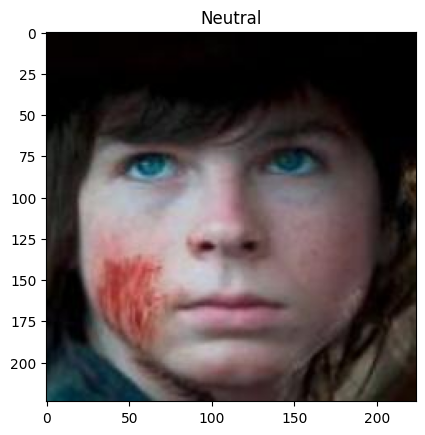

In [16]:
image_name = '1'
img = cv2.imread(f'./train_set/images/{image_name}.jpg')
label = np.load(f'./train_set/annotations/{image_name}_exp.npy')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(labels[int(label)])

Text(0.5, 1.0, 'Neutral')

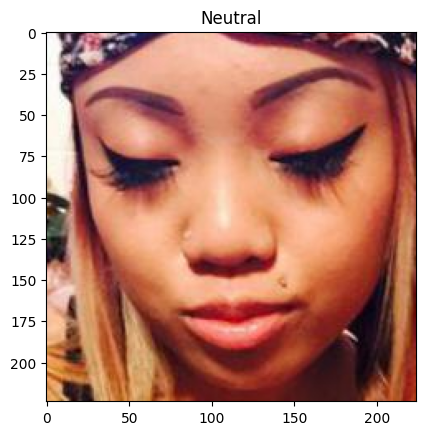

In [17]:
image_name = '2'
img = cv2.imread(f'./train_set/images/{image_name}.jpg')
label = np.load(f'./train_set/annotations/{image_name}_exp.npy')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(labels[int(label)])

Text(0.5, 1.0, 'Anger')

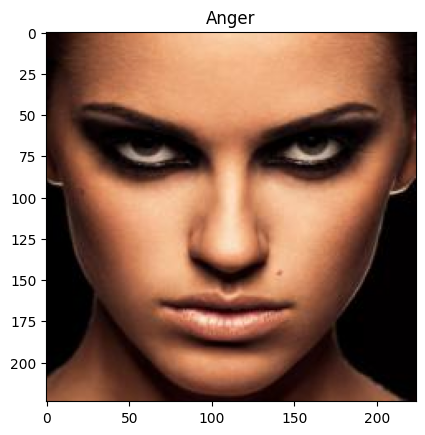

In [18]:
image_name = '348274'
img = cv2.imread(f'./train_set/images/{image_name}.jpg')
label = np.load(f'./train_set/annotations/{image_name}_exp.npy')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(labels[int(label)])

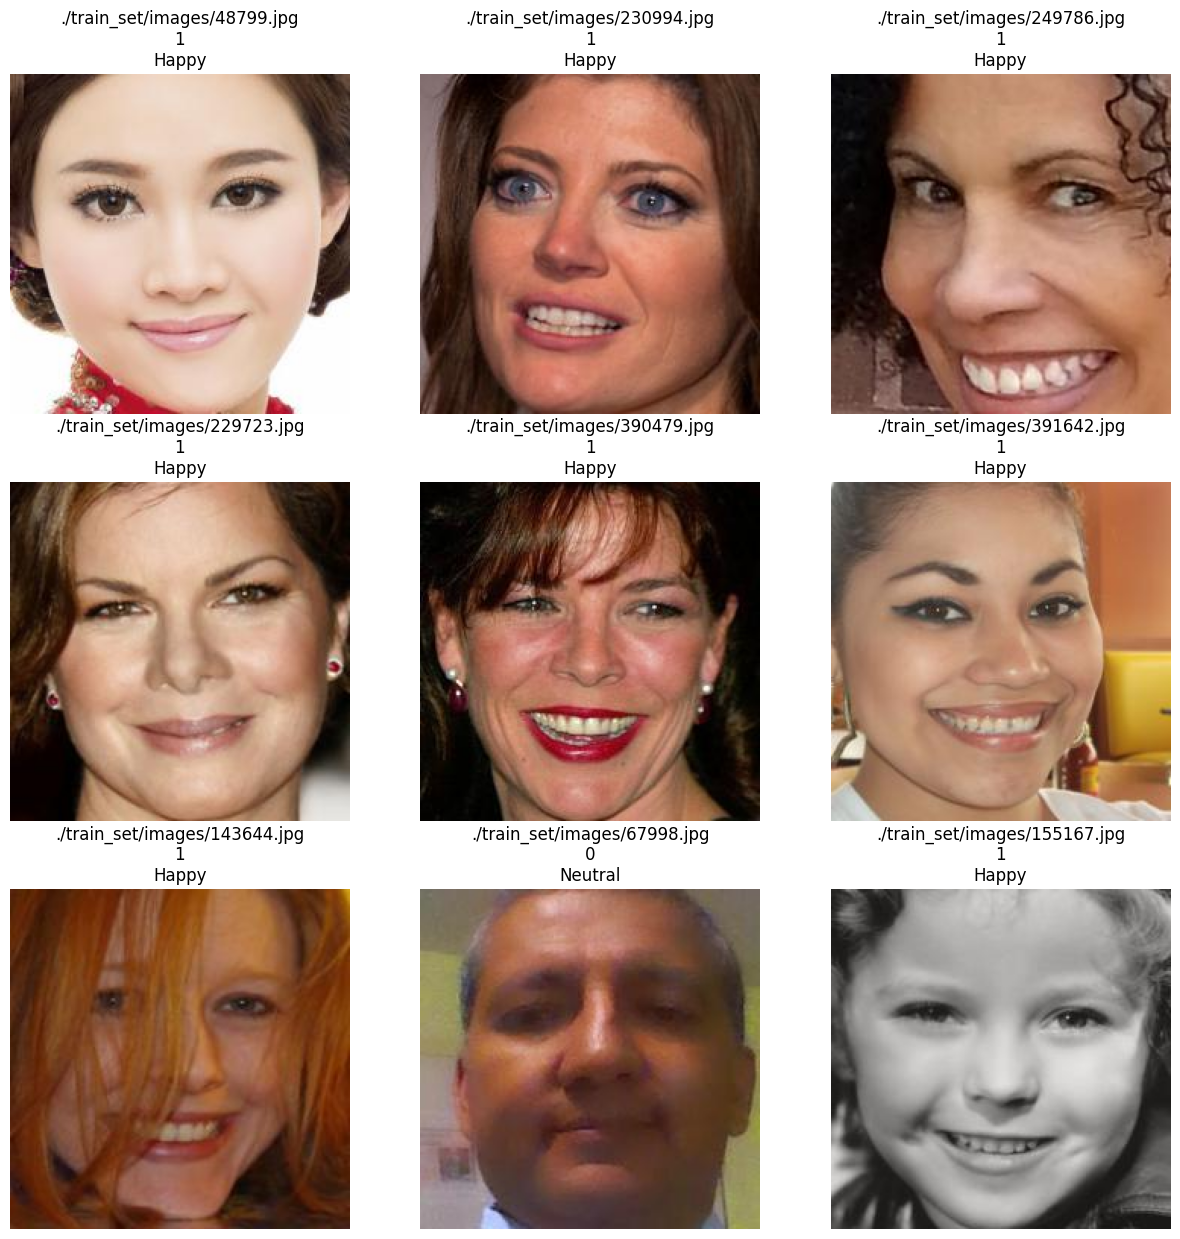

In [19]:
plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

for i, imgIndex in enumerate(np.random.choice(train_data_path, size = 9)):
  id = imgIndex.split('/')[-1].split('.')[0]
  plt.subplot(3, 3, i + 1)
  plt.axis(False)
  plt.grid(False)
  plt.title(f'{imgIndex}\n{np.load(f"./train_set/annotations/{id}_exp.npy")}\n{labels[int(np.load(f"./train_set/annotations/{id}_exp.npy"))]}')
  plt.imshow(cv2.cvtColor(cv2.imread(imgIndex), cv2.COLOR_BGR2RGB))
plt.show()

# Folder data based on labels (Trains)

In [20]:
import glob
from tqdm import tqdm
train_data_path = glob.glob('./train_set/images/*')

In [21]:
train_images_path = []
train_labels = []
for i in tqdm(range(len(train_data_path))):
  train_images_path.append(train_data_path[i])
  train_labels.append(int(np.load(f'./train_set/annotations/{train_data_path[i].split("/")[-1].split(".")[0]}_exp.npy')))

100%|██████████| 287651/287651 [02:16<00:00, 2110.03it/s]


In [22]:
id2label = {
     0: 'Neutral',
     1: 'Happy',
     2: 'Sad',
     3: 'Surprise',
     4: 'Fear',
     5: 'Disgust',
     6: 'Anger',
     7: 'Contempt'
}

label2id = {
     'Neutral': 0,
     'Happy': 1,
     'Sad': 2,
     'Surprise': 3,
     'Fear': 4,
     'Disgust': 5,
     'Anger': 6,
     'Contempt': 7
}

In [23]:
import os
if not os.path.exists('train_data'):
  os.mkdir('train_data')
  for dir_name in tqdm(label2id):
    os.mkdir('train_data/'+dir_name)

100%|██████████| 8/8 [00:00<00:00, 7774.43it/s]


In [24]:
# Move data shutil.move(source, destination)
import shutil
for path, label in tqdm(zip(train_images_path, train_labels)):
  shutil.move(path, 'train_data/'+id2label[label])

287651it [00:19, 15075.95it/s]


Text(0.5, 1.0, 'Class Distributions')

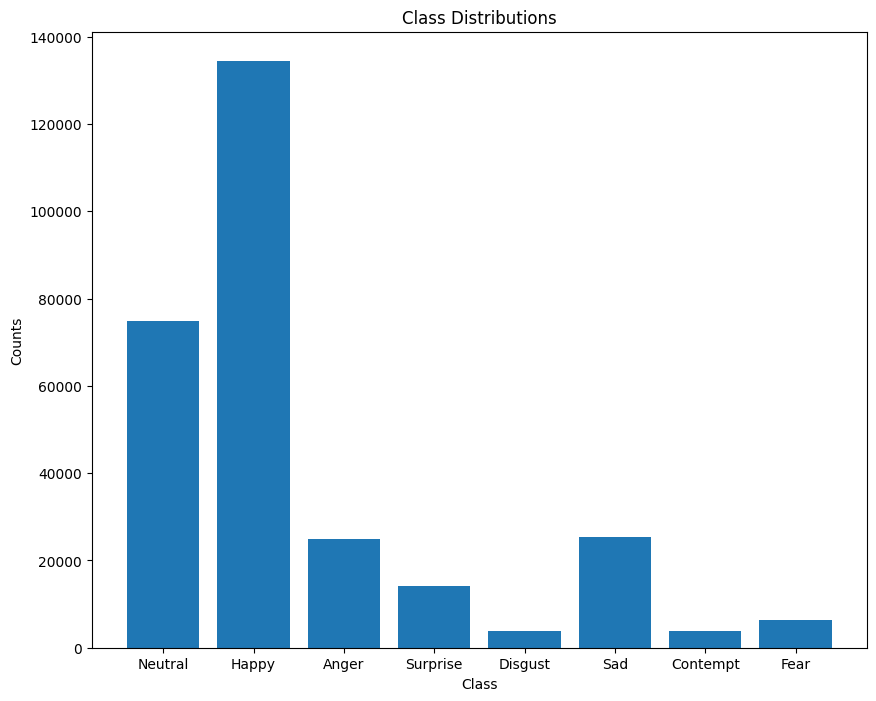

In [25]:
import collections
label_distributsion = collections.Counter(train_labels)
keys = []
for i in label_distributsion.keys():
  keys.append(id2label[i])
plt.figure(figsize=(10,8))
plt.bar(keys, label_distributsion.values())
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Class Distributions')

# Folder data based on labels (Validations)

In [26]:
import glob
from tqdm import tqdm
val_data_path = glob.glob('./val_set/images/*')

In [27]:
val_images_path = []
val_labels = []
for i in tqdm(range(len(val_data_path))):
  val_images_path.append(val_data_path[i])
  val_labels.append(int(np.load(f'./val_set/annotations/{val_data_path[i].split("/")[-1].split(".")[0]}_exp.npy')))

100%|██████████| 3999/3999 [00:00<00:00, 12379.02it/s]


In [28]:
import os
if not os.path.exists('val_data'):
  os.mkdir('val_data')
  for dir_name in tqdm(label2id):
    os.mkdir('val_data/'+dir_name)

100%|██████████| 8/8 [00:00<00:00, 14652.59it/s]


In [29]:
# Move data shutil.move(source, destination)
import shutil
for path, label in tqdm(zip(val_images_path, val_labels)):
  shutil.move(path, 'val_data/'+id2label[label])

3999it [00:00, 23630.00it/s]


Text(0.5, 1.0, 'Class Distributions')

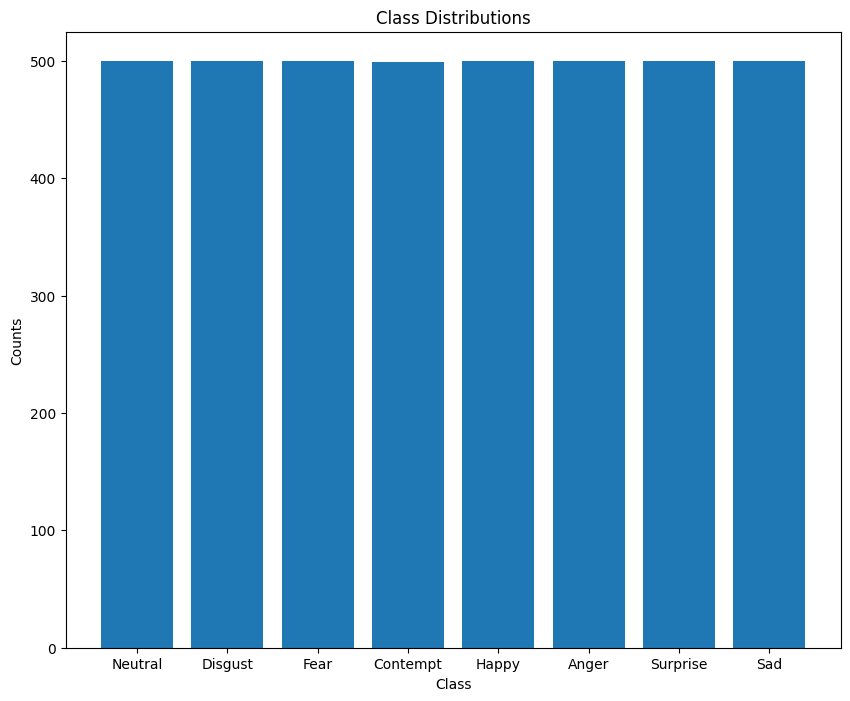

In [30]:
import collections
label_distributsion = collections.Counter(val_labels)
keys = []
for i in label_distributsion.keys():
  keys.append(id2label[i])
plt.figure(figsize=(10,8))
plt.bar(keys, label_distributsion.values())
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Class Distributions')

## Importing Libraries

In [31]:
# Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
import glob
import os
import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.models import  model_from_json
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense,LeakyReLU, BatchNormalization, ReLU

## **Train, Test preparation**

### Image Data Generator for training data using Image augmentation

In [32]:
train_gen = image.ImageDataGenerator(rescale = 1./255,
                               rotation_range = 30,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest',
                                     validation_split=0.1)

train_data = train_gen.flow_from_directory(directory= 'train_data/',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=32,
                                              subset='training'
                                             )
len(train_data)

Found 258889 images belonging to 8 classes.


8091

### Image Data Generator for validation data

In [33]:
val_data = train_gen.flow_from_directory(directory= 'train_data/',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=10,
                                              subset='validation'
                                             )
len(val_data)

Found 28762 images belonging to 8 classes.


2877

### Image Data Generator for Test data


In [34]:
test_gen = image.ImageDataGenerator(rescale = 1./255)
test_data = test_gen.flow_from_directory(directory= 'val_data/',
                                                   target_size=(224,224),
                                                   class_mode='categorical',
                                                   batch_size=10                                                   )
len(test_data)

Found 3999 images belonging to 8 classes.


400

## Sample images from generators

In [35]:
def plot_generator_images(gen, suptitle, labelDecDict, print_pred = False, model = None, nrows = 3, ncols = 3, figsize = (12, 12)):
    gen_data = gen.next()

    plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    plt.suptitle(suptitle, fontsize = 20)
    plt.tight_layout(rect = [0, 0, 1, 0.96], h_pad = 2)

    if(print_pred and model):
        pred = np.argmax(model.predict(gen_data[0]), axis=1)

    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.axis(False)
        plt.grid(False)

        if(print_pred and pred.any()):
            plt.title(f"True: {labelDecDict[np.argmax(gen_data[1][i])]}\nPredicted: {labelDecDict[np.argmax(pred[i])]}")
        else:
            plt.title(labelDecDict[np.argmax(gen_data[1][i])])
        plt.imshow(gen_data[0][i])

Training Samples

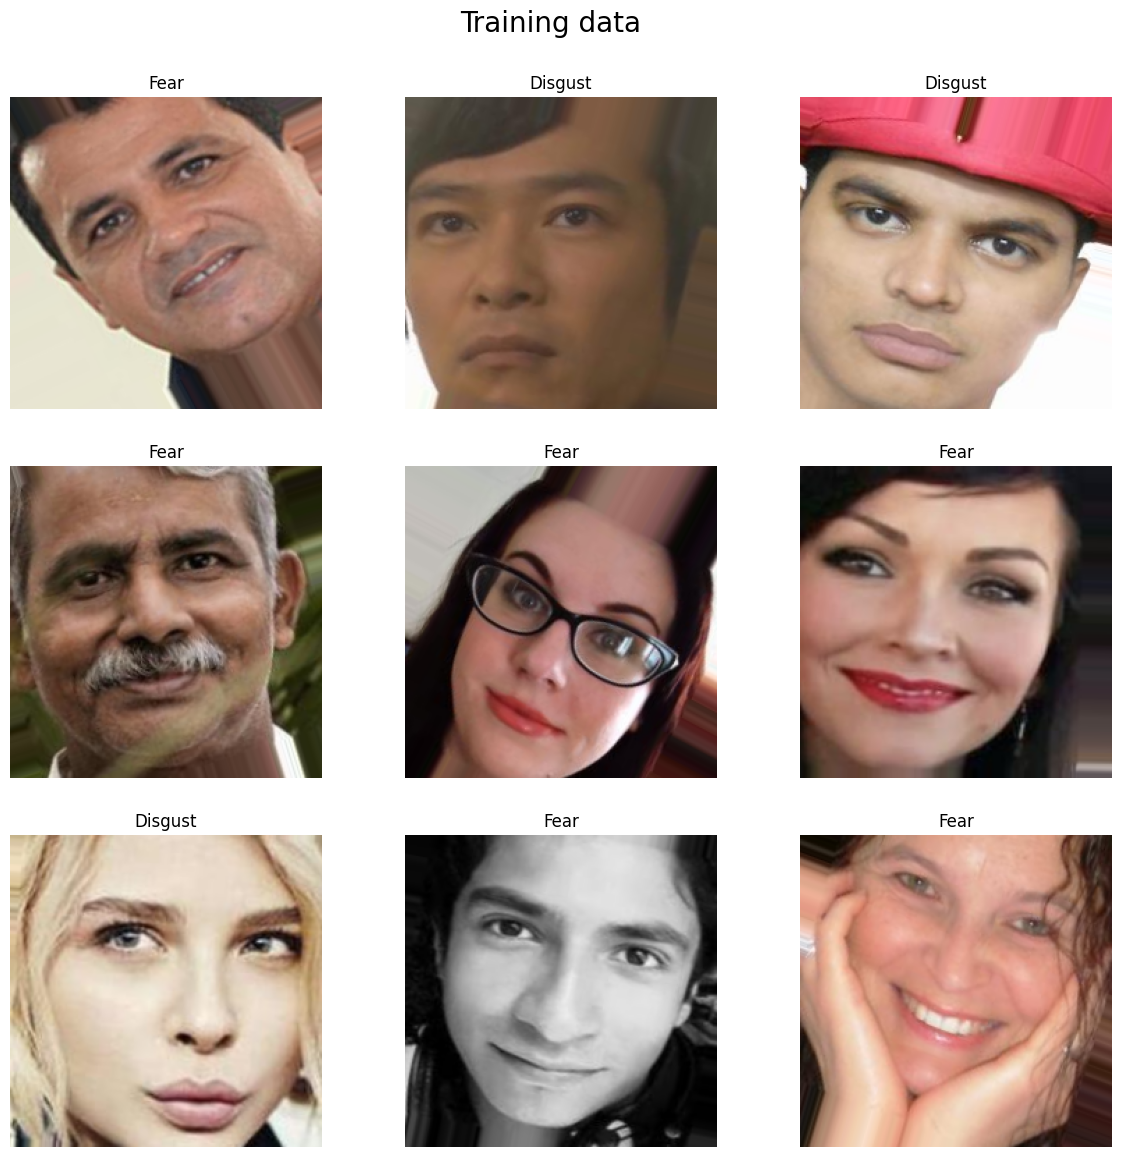

In [36]:
plot_generator_images(train_data, "Training data", id2label)

validation Samples

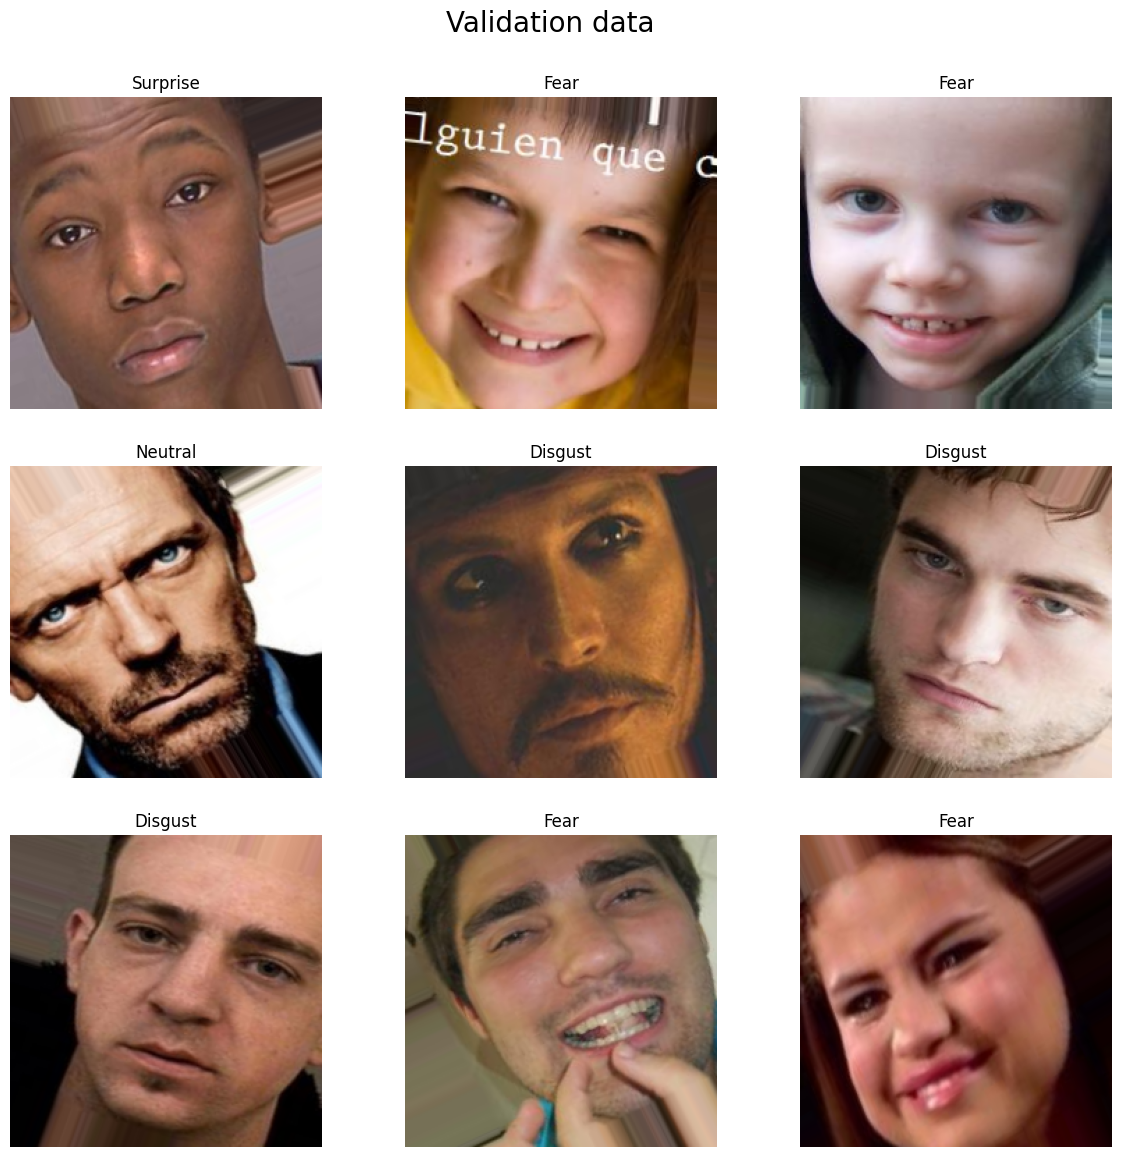

In [37]:
plot_generator_images(val_data, "Validation data", id2label)

# **CNN Model**

## **Model Creation**

In [41]:
model = Sequential([
    Conv2D(32, 5, padding = 'same', input_shape = ((224,224,3))),
    Conv2D(32, 5, padding = 'same', activation = LeakyReLU(alpha = 0.5)),
    MaxPooling2D(),
    Conv2D(32, 4, padding = 'same'),
    Conv2D(32, 4, padding = 'same', activation = LeakyReLU(alpha = 0.5)),
    MaxPooling2D(),

    Conv2D(64, 4, padding = 'same'),
    Conv2D(64, 4, padding = 'same', activation = LeakyReLU(alpha = 0.5)),
    MaxPooling2D(),
    BatchNormalization(),


    Conv2D(128, 3, padding = 'same'),
    Conv2D(128, 3, padding = 'same', activation = LeakyReLU(alpha = 0.5)),
    MaxPooling2D(),
    Conv2D(128, 2, padding = 'same'),
    Conv2D(128, 2, padding = 'same', activation = LeakyReLU(alpha = 0.5)),
    MaxPooling2D(),

    Conv2D(256, 2, padding = 'same'),
    Conv2D(256, 2, padding = 'same', activation = LeakyReLU(alpha = 0.5)),
    MaxPooling2D(),

    Flatten(),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation = 'sigmoid'),
    Dropout(0.2),
    Dense(256, activation = 'sigmoid'),
    Dropout(0.1),
    Dense(len(id2label), activation = 'softmax')
])

LEARNING_RATE = 0.0001
model.compile(optimizer = Adam(LEARNING_RATE),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 32)      16416     
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 32)      16416     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                 

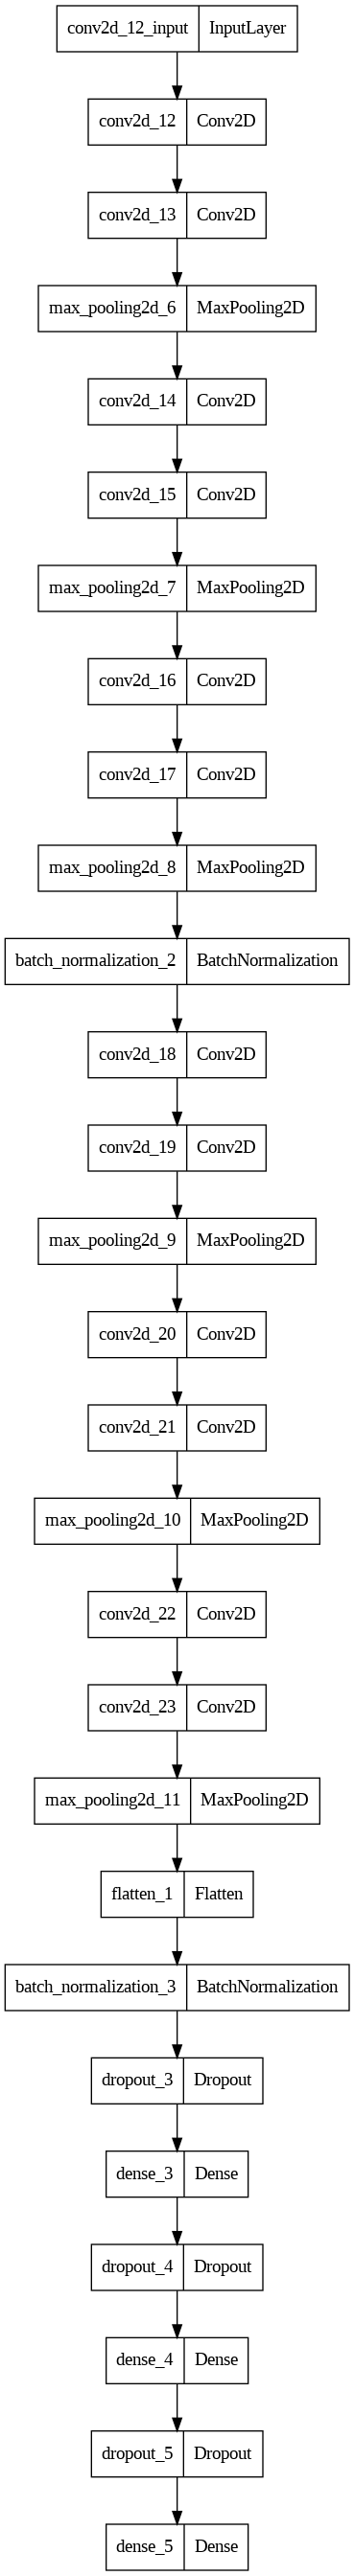

In [42]:
from tensorflow.keras import utils
utils.plot_model(model)

In [ ]:
# run model
history = model.fit(
    train_data,
    validation_data= val_data,
    epochs=3
)

Epoch 1/3
8091/8091 [==============================] - 4618s 570ms/step - loss: 1.0498 - accuracy: 0.6338 - val_loss: 0.9070 - val_accuracy: 0.6869
Epoch 2/3
8091/8091 [==============================] - 4553s 563ms/step - loss: 0.8859 - accuracy: 0.6909 - val_loss: 0.8274 - val_accuracy: 0.7100
Epoch 3/3
2985/8091 [==========>...................] - ETA: 43:40 - loss: 0.8465 - accuracy: 0.7029

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


### **Model Evalution**

In [ ]:
test_loss, test_acc = model.evaluate(test_data, verbose = 0)

print(f"Loss on Testing data: {test_loss}")
print(f"Accuracy on Testing data: {test_acc}")

### **Plotting Test Results**

In [ ]:
plot_generator_images(test_data, "Testing data", id2label, print_pred = True, model = model)

## **Saving Model**

In [ ]:
model.save('./cnn_base.hd5')

# **Load Saved Model**

In [ ]:
saved_model = tf.keras.models.load_model('./cnn_base.hd5')

sm_test_loss, sm_test_acc = saved_model.evaluate(test_data, verbose = 0)

print(f"Loss on Testing data: {sm_test_loss}")
print(f"Accuracy on Testing data: {sm_test_acc}")

# Evaluation
### It's time to see how the model can predict unseen data. Therefore, the following section compares the actual label of each image with the predicted label.

In [ ]:
# The model performace chaching

X_test, y_test = next(test_data)
y_proba = model.predict(X_test)
for i in range(len(y_proba)):
    classFinal = y_proba[i].argmax()
    print(f'Predicted Class: {id2label[classFinal]}')
    print(f'Correct Class : {id2label[y_test[i].argmax()]}')
    plt.imshow(X_test[i])
    plt.show()
  #  break

In [ ]:
# Store the data in X_train, y_train variables by iterating over the batches

import numpy
test_data.reset()
X_test,y_test = next(test_data)
for i in range(0,(numpy.math.ceil(test_data.samples / test_data.batch_size)-1)):
  img, label = next(test_data)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)



In [ ]:
# Calculate (Precision,Recall,F1-score) for each category

from sklearn.metrics import confusion_matrix,classification_report
import numpy

test_steps_per_epoch = numpy.math.ceil(test_data.samples / test_data.batch_size)

#predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
predictions = model.predict(X_test)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = numpy.argmax(y_test, axis=1)
class_labels = list(test_data.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

### From the previous table and confusion matrix (in the next section), It can be understood that model is struggling with predicting animals with similar features. For example, american_bulldog and staffordshire_bull_terrier have many familiar elements that toughen decision-making even for humans.

In [ ]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)



# compute the confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=80)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',color='blue')
    plt.xlabel('Predicted label',color='blue')


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = class_labels, title="Confusion matrix")


# Pretrained Models

In [ ]:
# Loud ResNet model

resnet50 = 'https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'  # get structured ResNet model
ResNet = hub.KerasLayer(resnet50, trainable = False) #set ResNet setting

In [ ]:
data = tf.keras.Input(shape=(224,224,3)) # input shape
L1 = ResNet(data) # ResNet laye

L2 = Dense(256, activation='relu')(L1) # Fully conected layer
L2 = Dropout(0.3)(L2) # for reducing overfitting

L3 = Dense(128, activation='relu')(L2) # Fully conected layer
L3 = Dropout(0.3)(L3)

out = Dense(37, activation='softmax')(L3) # Output layer for classification

model = tf.keras.Model(data, out) # build model
LEARNING_RATE = 0.0001
optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy']) # config model

model.summary()

# run model
history = model.fit(
    train_data,
    validation_data= val_data,
    epochs=10
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              25615849  
                                                                 
 dense (Dense)               (None, 256)               256512    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 37)                4773  

# **Findings**

### 1. Train accuracy in the first epoch was significantly lower than val_accuracy—accuracy reported by calculating the average of each batch. Therefore, after 60 batches in the first epoch, the model performed much better with the validation set.

### 2. Overfitting happens because the model memories input data and its label. Hence, the model fails to extract valuable features and classification against unseen data. With dropout, we can reduce the effect and force the model to look for features. The dropout technique randomly removes nodes from architecture.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


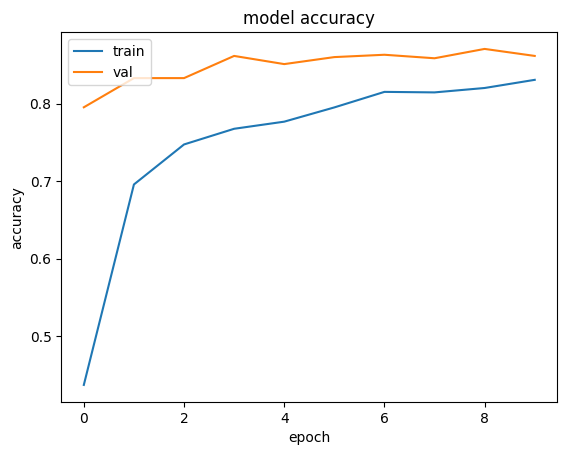

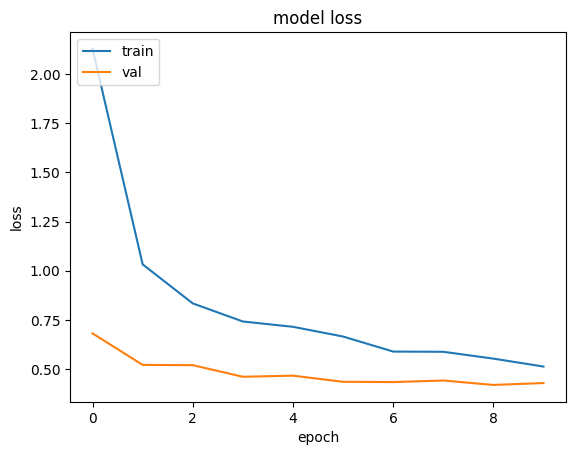

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Evaluation

1/1 [==============================] - 1s 798ms/step
Predicted Class: Sphynx
Correct Class : Sphynx


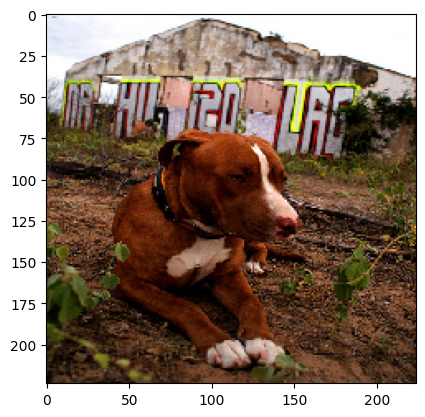

Predicted Class: keeshond
Correct Class : keeshond


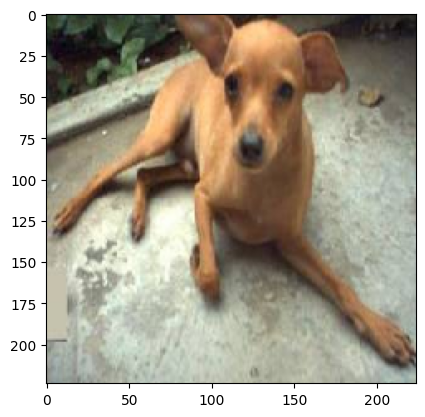

Predicted Class: miniature_pinscher
Correct Class : beagle


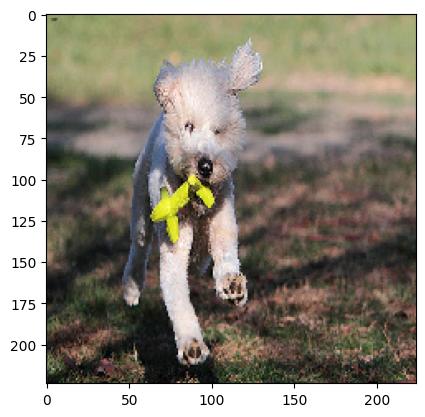

Predicted Class: pug
Correct Class : pug


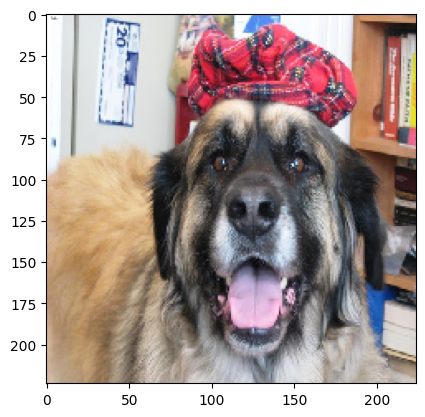

Predicted Class: saint_bernard
Correct Class : saint_bernard


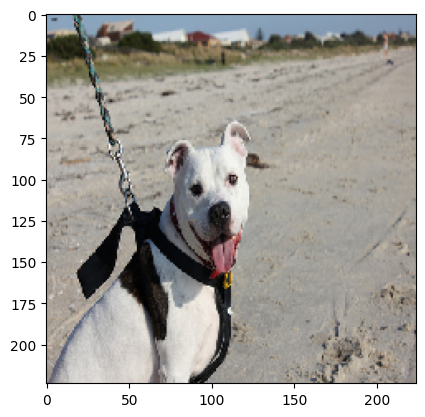

Predicted Class: havanese
Correct Class : Egyptian_Mau


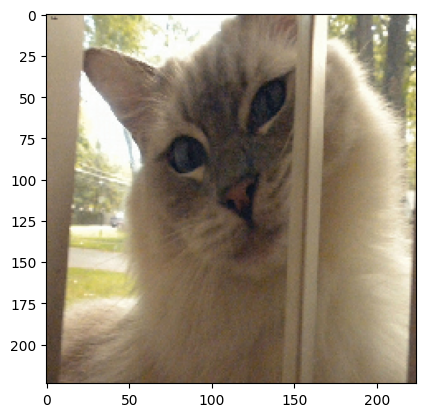

Predicted Class: Sphynx
Correct Class : Bengal


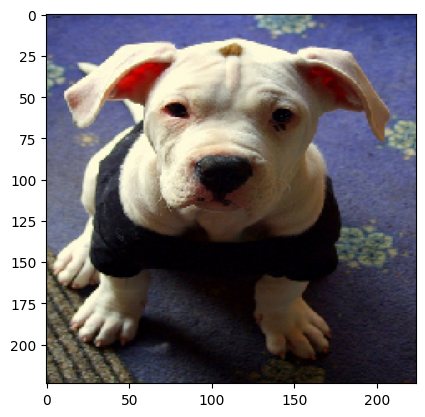

Predicted Class: boxer
Correct Class : boxer


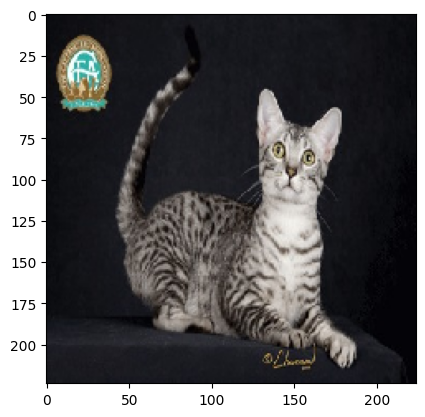

Predicted Class: miniature_pinscher
Correct Class : miniature_pinscher


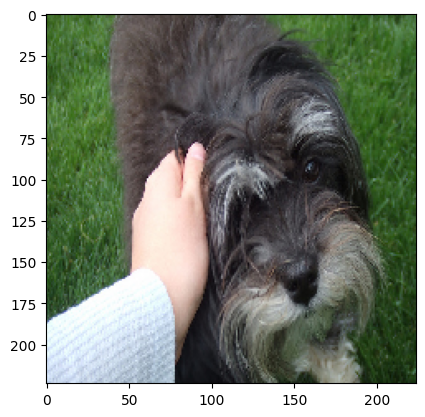

Predicted Class: keeshond
Correct Class : keeshond


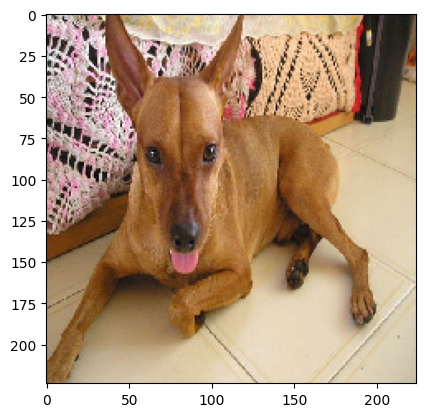

In [ ]:
# The model performace chaching

X_test, y_test = next(test_data)
y_proba = model.predict(X_test)
for i in range(len(y_proba)):
    classFinal = y_proba[i].argmax()
    print(f'Predicted Class: {classNames[classFinal]}')
    print(f'Correct Class : {classNames[y_test[i].argmax()]}')
    plt.imshow(X_test[i])
    plt.show()
  #  break

In [ ]:
# Store the data in X_train, y_train variables by iterating over the batches

import numpy
test_data.reset()
X_test,y_test = next(test_data)
for i in range(0,(numpy.math.ceil(test_data.samples / test_data.batch_size)-1)):
  img, label = next(test_data)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)



(740, 224, 224, 3) (740, 37)


In [ ]:
# Calculate (Precision,Recall,F1-score) for each category

from sklearn.metrics import confusion_matrix,classification_report
import numpy

test_steps_per_epoch = numpy.math.ceil(test_data.samples / test_data.batch_size)

#predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
predictions = model.predict(X_test)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = numpy.argmax(y_test, axis=1)
class_labels = list(test_data.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

24/24 [==============================] - 2s 82ms/step
                            precision    recall  f1-score   support

                Abyssinian       0.92      0.80      0.86        15
                    Bengal       0.68      1.00      0.81        19
                    Birman       0.78      0.82      0.80        22
                    Bombay       0.81      1.00      0.90        22
         British_Shorthair       0.76      0.73      0.74        22
              Egyptian_Mau       1.00      0.64      0.78        22
                Maine_Coon       0.75      1.00      0.86        12
                   Persian       0.95      0.95      0.95        19
                   Ragdoll       0.74      0.71      0.72        24
              Russian_Blue       0.80      0.64      0.71        25
                   Siamese       1.00      0.92      0.96        26
                    Sphynx       0.82      1.00      0.90        27
          american_bulldog       0.59      0.67      0.62    

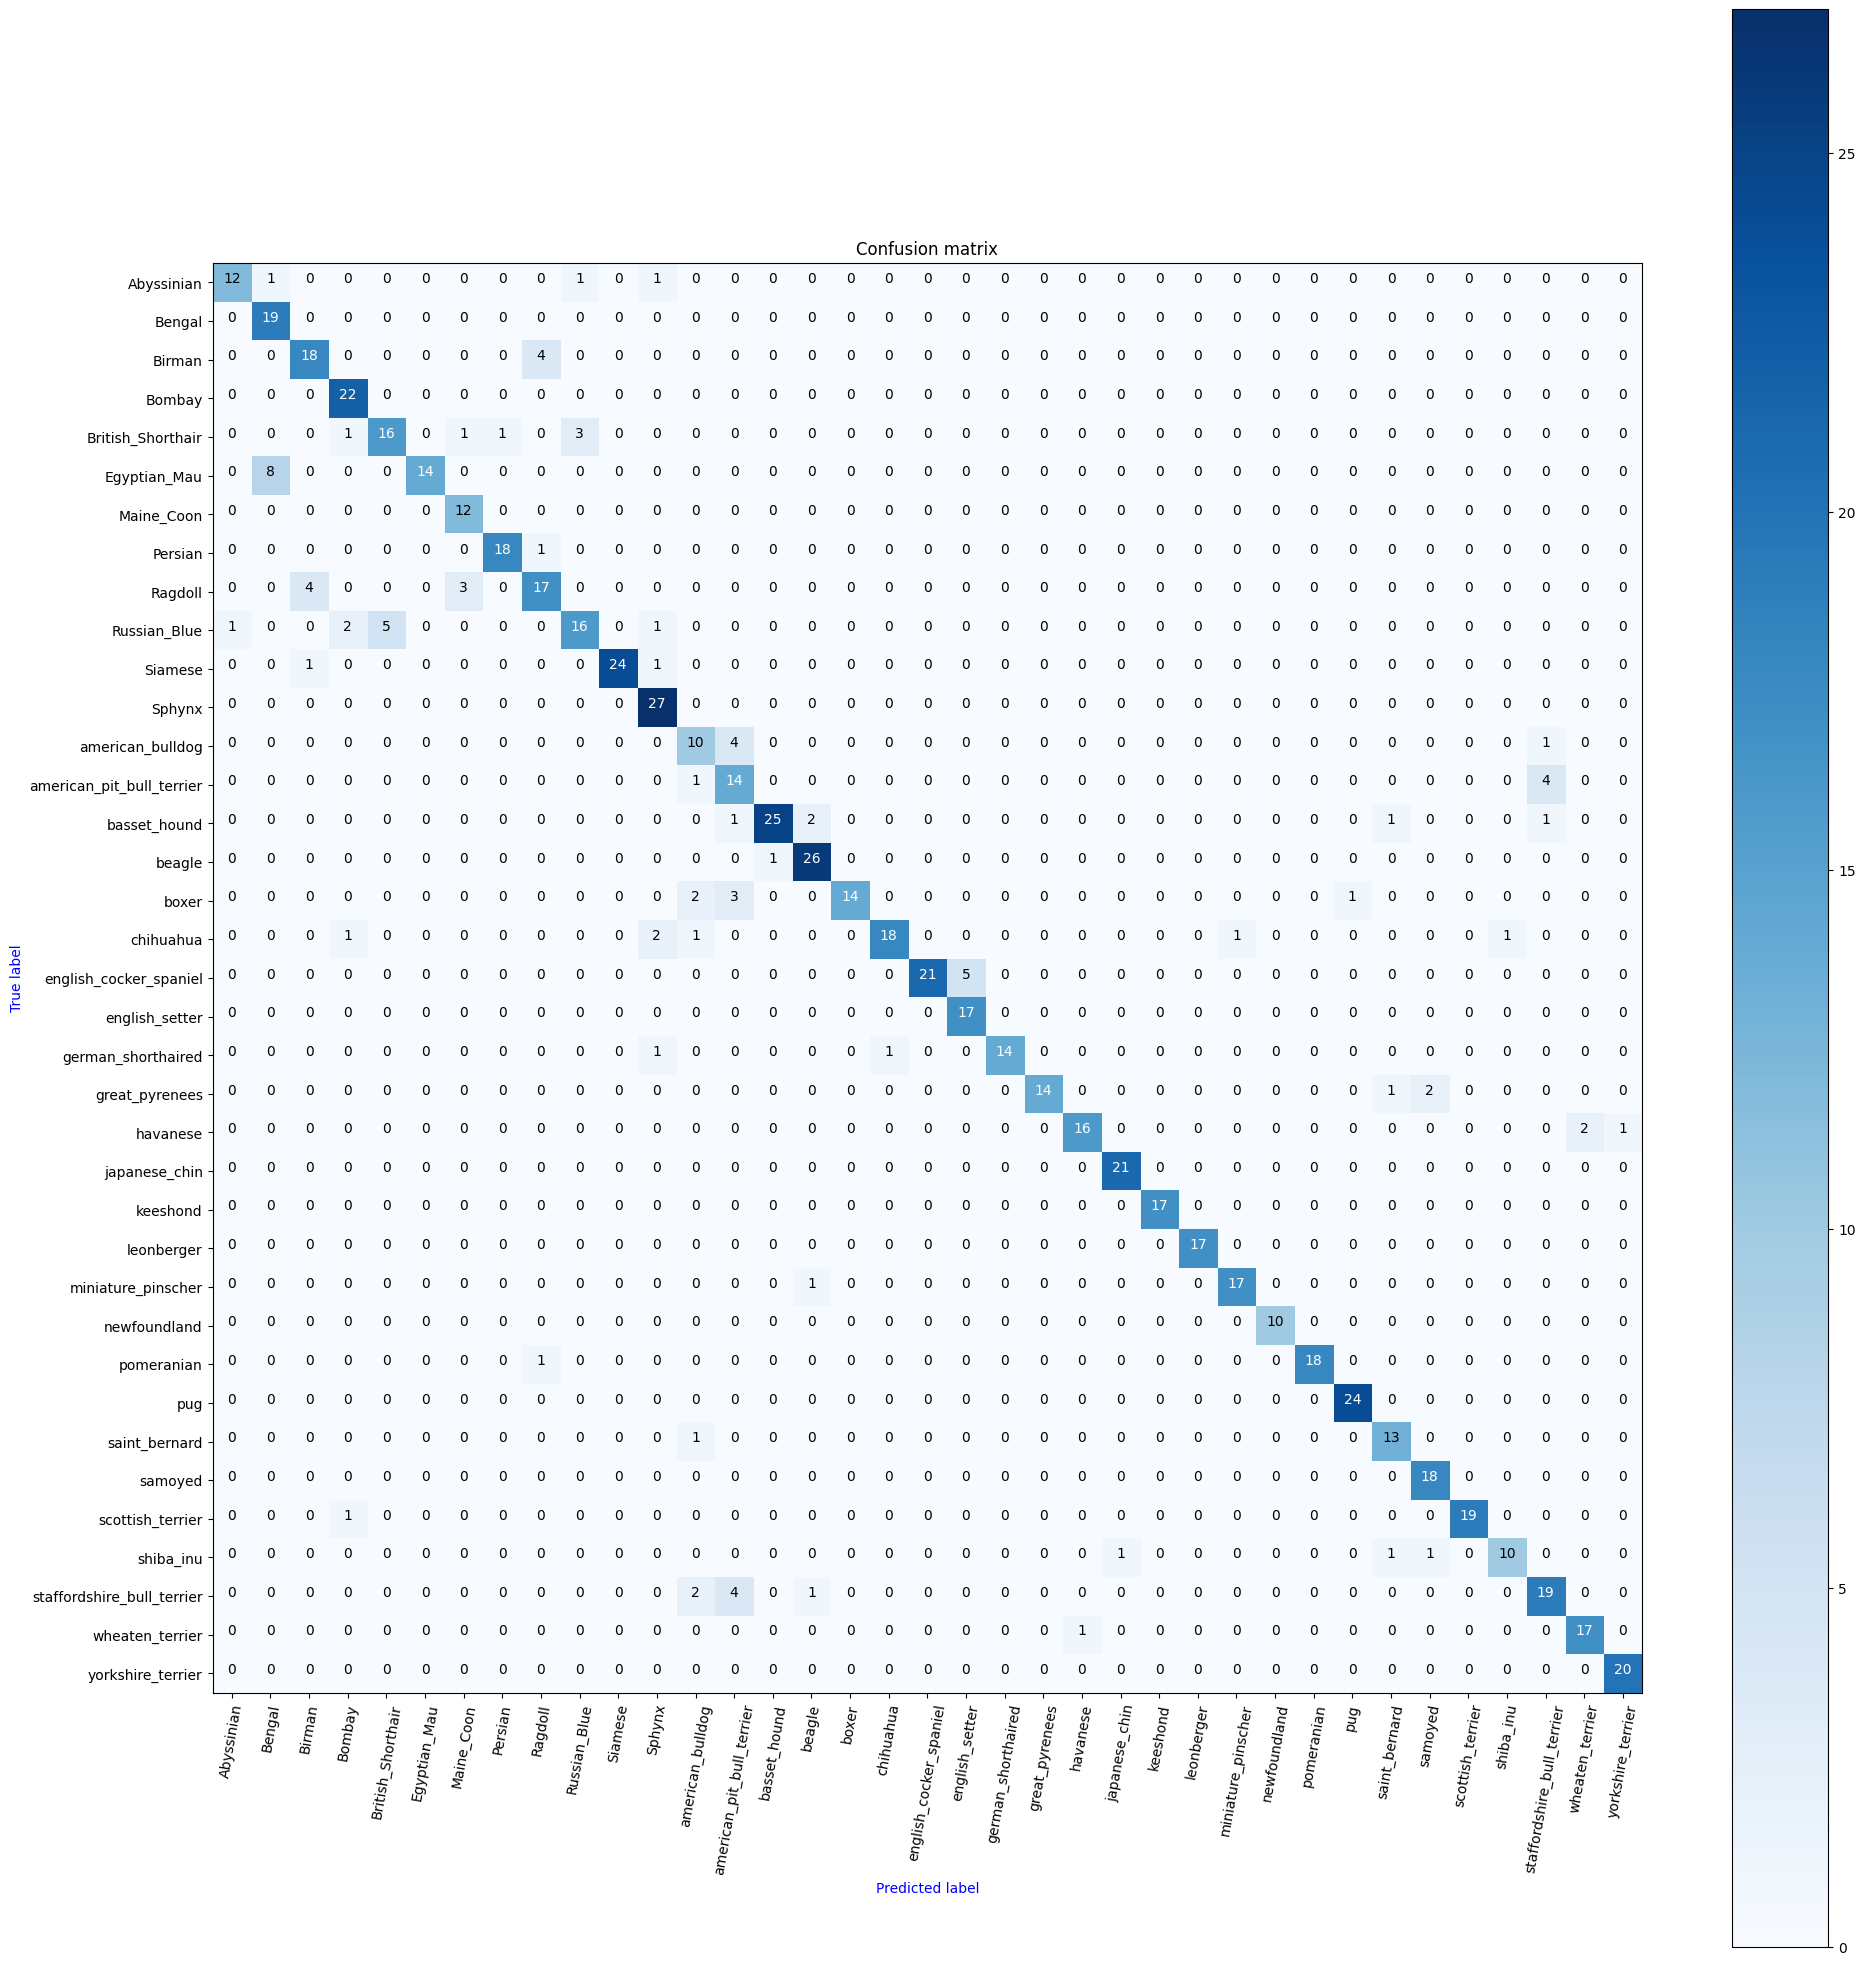

In [ ]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)



# compute the confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=80)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',color='blue')
    plt.xlabel('Predicted label',color='blue')


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = class_labels, title="Confusion matrix")
